In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense


In [2]:
df_raw = pd.read_csv(r'C:\Users\sahus\Stress-Prediction\cluster_new_raw_test.csv')
df_raw.head()

,id,EDA,TEMP,BVP,HR,Cluster
0,4,0.563729,4.00,64.0,1.00,0
1,4,-0.000000,33.99,-0.0,83.00,0
2,4,0.382858,33.99,-0.0,83.00,1
3,4,0.438379,33.99,-0.0,75.33,1
4,4,0.414428,33.99,-0.0,70.50,1


In [3]:

X = df_raw[['EDA', 'TEMP', 'BVP', 'HR']]
y = df_raw['Cluster']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.9773010983816045


In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.9043514230209557


                               SARIMAX Results                                
Dep. Variable:                     HR   No. Observations:               451270
Model:                 ARIMA(5, 1, 0)   Log Likelihood            -1871191.084
Date:                Sat, 09 Nov 2024   AIC                        3742394.167
Time:                        14:33:26   BIC                        3742460.286
Sample:                             0   HQIC                       3742412.965
                             - 451270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8310      0.001   -792.645      0.000      -0.833      -0.829
ar.L2         -0.6622      0.001   -500.194      0.000      -0.665      -0.660
ar.L3         -0.4944      0.001   -349.257      0.0

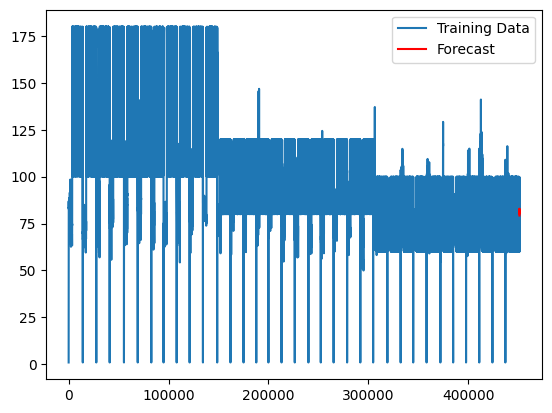

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Using only a recent window for ARIMA to reduce computation time
recent_data = df_raw['HR'] # Use only last 10,000 points for ARIMA

model = ARIMA(recent_data, order=(5, 1, 0))  # Adjust order as necessary
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=100)  # Forecast next 100 steps
plt.plot(recent_data, label="Training Data")
plt.plot(range(len(recent_data), len(recent_data)+100), forecast, color='red', label="Forecast")
plt.legend()
plt.show()
